FASE 4: ANÁLISIS EXPLORATORIO (EDA)

Extraer los datos desde MongoDB Atlas hacia Pandas, analizarlos estadísticamente, detectar anomalías (outliers, nulos, inconsistencias) y visualizar los resultados.

PASO 1 — Extracción desde MongoDB

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pymongo import MongoClient

In [ ]:
#Conexión a MongoDB
uri = "mongodb+srv://noemi_db_user:CENSURADO=ClusterDataSciencieLAB"

client = MongoClient(uri)
db = client["etl_cafe"]
collection = db["cafe_sales_clean"]

#Extraer todos los documentos de la colección
data_from_db = list(collection.find({}, {"_id": 0}))  # excluimos el campo _id
eda_df = pd.DataFrame(data_from_db)

print("Datos recuperados desde MongoDB:", eda_df.shape)
print(eda_df.head())


Datos recuperados desde MongoDB: (10000, 13)
  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0          4.0   
1    TXN_4977031    Cake       4.0             3.0         12.0   
2    TXN_4271903  Cookie       4.0             1.0          4.0   
3    TXN_7034554   Salad       2.0             5.0         10.0   
4    TXN_3160411  Coffee       2.0             2.0          4.0   

   Payment Method  Location Transaction Date Transaction Month Day of Week  \
0     Credit Card  Takeaway       2023-09-08           2023-09      Friday   
1            Cash  In-store       2023-05-16           2023-05     Tuesday   
2     Credit Card  In-store       2023-07-19           2023-07   Wednesday   
3             NaN       NaN       2023-04-27           2023-04    Thursday   
4  Digital Wallet  In-store       2023-06-11           2023-06      Sunday   

   Expected Price  Price Deviation  Category  
0             2.0              0.0  

PASO 2 — Análisis descriptivo general

In [3]:
#Tipos de datos
print("\nTipos de datos por columna:")
print(eda_df.dtypes)

#Resumen estadístico
print("\nResumen estadístico:")
print(eda_df.describe(include="all"))

#Conteo de valores nulos
print("\nValores nulos por columna:")
print(eda_df.isnull().sum())



Tipos de datos por columna:
Transaction ID        object
Item                  object
Quantity             float64
Price Per Unit       float64
Total Spent          float64
Payment Method        object
Location              object
Transaction Date      object
Transaction Month     object
Day of Week           object
Expected Price       float64
Price Deviation      float64
Category              object
dtype: object

Resumen estadístico:
       Transaction ID   Item     Quantity  Price Per Unit  Total Spent  \
count           10000   9031  9521.000000     9467.000000  9960.000000   
unique          10000      8          NaN             NaN          NaN   
top       TXN_1961373  Juice          NaN             NaN          NaN   
freq                1   1171          NaN             NaN          NaN   
mean              NaN    NaN     3.028463        2.949984     8.930924   
std               NaN    NaN     1.419007        1.278450     6.004475   
min               NaN    NaN     1.00000

PASO 3 — Análisis univariante

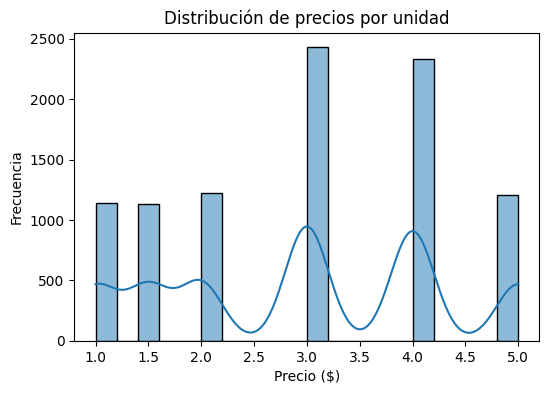

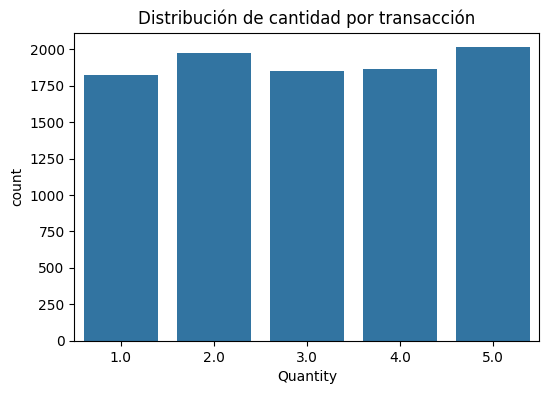

In [4]:

#Gráfico de distribución de precios por unidad
plt.figure(figsize=(6,4))
sns.histplot(eda_df["Price Per Unit"], bins=20, kde=True)
plt.title("Distribución de precios por unidad")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.show()

#Distribución de cantidad comprada
plt.figure(figsize=(6,4))
sns.countplot(x="Quantity", data=eda_df)
plt.title("Distribución de cantidad por transacción")
plt.show()


PASO 4 — Análisis bivariante 

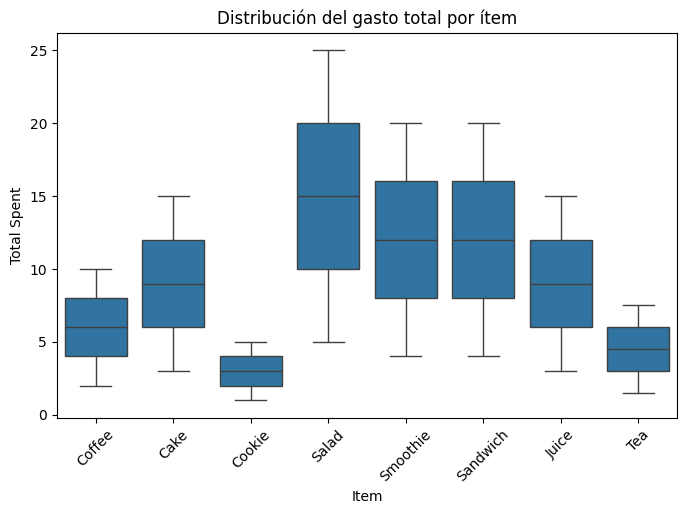

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Item", y="Total Spent", data=eda_df)
plt.title("Distribución del gasto total por ítem")
plt.xticks(rotation=45)
plt.show()


PASO 5 — Detección de outliers

In [6]:
Q1 = eda_df["Total Spent"].quantile(0.25)
Q3 = eda_df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1

outliers = eda_df[(eda_df["Total Spent"] < Q1 - 1.5*IQR) | (eda_df["Total Spent"] > Q3 + 1.5*IQR)]
print(f"outliers detectados: {len(outliers)} registros")


outliers detectados: 268 registros
